In [129]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string as s
from nltk.tokenize import RegexpTokenizer

In [94]:

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
dataset = pd.read_csv("/content/drive/MyDrive/SEM-6/ML/Data_Lab06/training.1600000.processed.noemoticon.csv",encoding="latin", names=columns)
reduced_data_n = dataset.iloc[:1000,:]
reduced_data_p = dataset.iloc[-1000:,:]
reduced_data = pd.concat([reduced_data_n,reduced_data_p])

In [ ]:
print(reduced_data['sentiment'])
print(reduced_data.info())
print(reduced_data.head())

In [96]:
reduced_data["sentiment"] = reduced_data["sentiment"].apply(lambda x: 1 if x>0 else x)
# reduced_data["sentiment"] = reduced_data["sentiment"].replace(4,1)
print(reduced_data['sentiment'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: sentiment, Length: 2000, dtype: int64


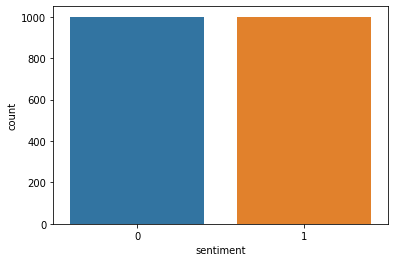

In [98]:
sns.countplot(x="sentiment",data=reduced_data)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not rea

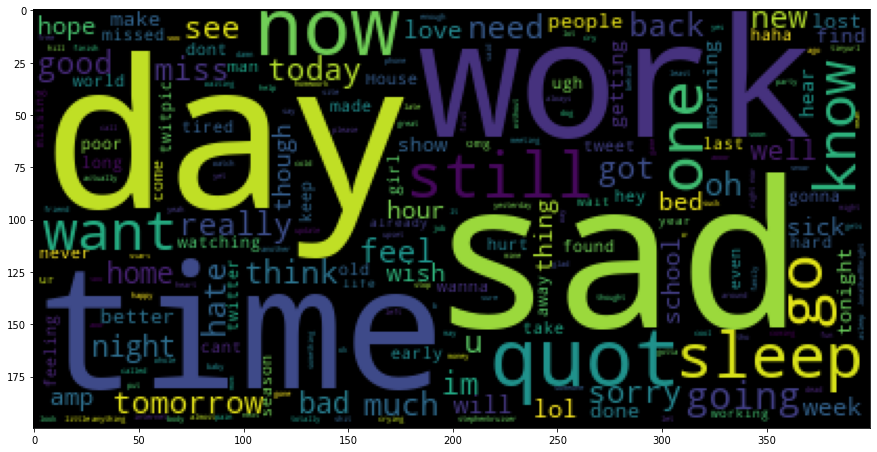

In [97]:
negative_tweets = reduced_data[reduced_data['sentiment'] == 0]['text'].tolist()
negative_tweets_string = " ".join(negative_tweets)
print(negative_tweets_string)

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_tweets_string))

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not rea

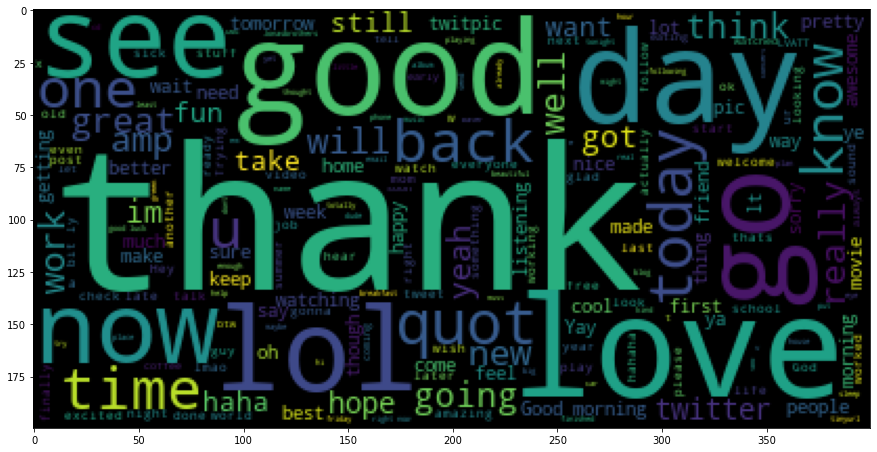

In [99]:
positive_tweets = reduced_data[reduced_data['sentiment'] == 1]['text'].tolist()
positive_tweets_string = " ".join(positive_tweets)
print(negative_tweets_string)

plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

In [ ]:
print(f'total nulls: {reduced_data.isnull().sum().sum()}')
reduced_data['sentiment'].unique()
reduced_data.info()
reduced_data['date'] = reduced_data['date'].str.lower()
reduced_data['query'] = reduced_data['query'].str.lower()
reduced_data['user_id'] = reduced_data['user_id'].str.lower()
reduced_data['text'] = reduced_data['text'].str.lower()

In [130]:
# print(reduced_data['text'])
stopwords = '''i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now'''

stopwords = stopwords.split('\n')
print(stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

reduced_data['text'] = reduced_data['text'].apply(lambda x: cleaning_stopwords(x))
# reduced_data['sentiment']

pun = s.punctuation
def cleaning_pun(text):
    return text.translate(str.maketrans('', '', pun))
reduced_data['text'] = reduced_data['text'].apply(lambda x: cleaning_pun(x))

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

reduced_data['text'] = reduced_data['text'].apply(lambda x: cleaning_repeating_char(x))

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

reduced_data['text'] = reduced_data['text'].apply(lambda x: cleaning_URLs(x))

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

reduced_data['text'] = reduced_data['text'].apply(lambda x: cleaning_numbers(x))


tokenizer = RegexpTokenizer(r'w+')

reduced_data['text'] = reduced_data['text'].apply(tokenizer.tokenize)

print(reduced_data['text'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no